
Ejercicio de Regresión Lineal Simple: Predicción de Ventas de Videoconsolas con un Solo Parámetro
Contexto
Eres un analista de datos en una empresa de tecnología que está interesada en predecir las ventas de sus nuevas videoconsolas. Tienes acceso a un conjunto de datos histórico que incluye características relevantes sobre las consolas vendidas en los últimos años. Tu tarea es construir un modelo de regresión lineal simple para predecir las ventas futuras utilizando solo una característica: Precio.

Conjunto de Datos
Tienes un archivo CSV llamado ventas_videoconsolas.csv que contiene la siguiente información:

Año: El año en que se realizaron las ventas.
Modelo: El modelo de la videoconsola.
Precio: El precio de la videoconsola.
Marketing: El presupuesto de marketing en millones de dólares.
Reseñas: El promedio de puntuaciones de reseñas de los usuarios.
Ventas: Las ventas totales en millones de unidades.
Tareas
Carga y Exploración de Datos:

Importa el archivo CSV utilizando pandas y muestra las primeras filas del conjunto de datos.
Realiza un análisis exploratorio de los datos (EDA), enfocándote en las variables Precio y Ventas.
Preparación de Datos:

Realiza la limpieza de datos si es necesario (manejo de valores nulos, eliminación de duplicados, etc.).
Selecciona solo las columnas Precio y Ventas para este ejercicio.
División de Datos:

Divide el conjunto de datos en conjuntos de entrenamiento y prueba (80% entrenamiento, 20% prueba).
Construcción del Modelo:

Utiliza sklearn.linear_model.LinearRegression para construir un modelo de regresión lineal simple utilizando Precio como la característica predictora.
Entrena el modelo utilizando el conjunto de entrenamiento.
Evaluación del Modelo:

Evalúa el rendimiento del modelo en el conjunto de prueba utilizando métricas adecuadas (por ejemplo, MSE, R²).
Genera una gráfica de predicciones vs. valores reales para visualizar el rendimiento del modelo.
Optimización del Modelo:

Implementa la técnica de Gradiente Descendente manualmente utilizando numpy para ajustar los parámetros del modelo considerando solo la característica Precio.
Compara los resultados del modelo optimizado manualmente con los obtenidos utilizando sklearn.
Entregables
Un archivo Jupyter Notebook (ventas_videoconsolas_regresion_simple.ipynb) que incluya:
Código y resultados de cada una de las tareas descritas anteriormente.
Comentarios y análisis de los resultados obtenidos.
Conclusiones sobre el rendimiento del modelo y posibles mejoras.

In [168]:
import numpy as np
# Datos ficticios coherentes
data = {
    'Año': np.random.choice(range(2020, 2025), 50),
    'Modelo': [f'Modelo{i}' for i in range(1, 51)],
    'Precio': np.random.randint(200, 500, 50),
    'Marketing': np.random.randint(10, 35, 50),
    'Reseñas': np.random.uniform(3.0, 5.0, 50).round(1),
    'Ventas': np.round(2.5 - 0.005 * np.random.randint(200, 500, 50) + 0.3 * np.random.uniform(3.0, 5.0, 50), 2)
}
X = np.array(data['Precio'])
y = np.array(data['Ventas'])

print("La longitud del conjunto de datos es:", len(X))
X

La longitud del conjunto de datos es: 50


array([485, 372, 495, 381, 458, 406, 360, 496, 213, 443, 320, 315, 304,
       380, 264, 300, 257, 412, 450, 239, 330, 246, 373, 242, 344, 482,
       496, 258, 370, 375, 216, 491, 440, 408, 422, 451, 240, 226, 233,
       406, 431, 226, 485, 390, 350, 293, 427, 465, 256, 389])

In [170]:
import matplotlib.pyplot as plt
%matplotlib inline

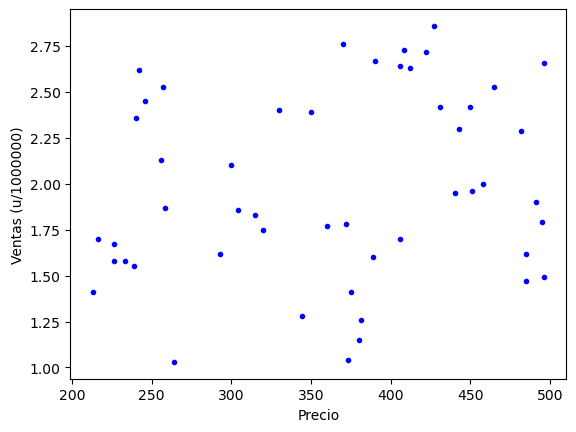

In [172]:
plt.plot(X,y,"b.")
plt.xlabel("Precio")
plt.ylabel("Ventas (u/1000000)")
plt.show()

In [174]:
import pandas as pd

In [176]:
data = {'Precio': X.flatten(), 'Ventas': y.flatten()}
df = pd.DataFrame(data)

df.head(10)

,Precio,Ventas
0,485,1.47
1,372,1.78
2,495,1.79
3,381,1.26
4,458,2.00
5,406,2.64
6,360,1.77
7,496,2.66
8,213,1.41
9,443,2.30


In [178]:
#Ajustamos el escalado del número de ventas
df['Ventas'] = df['Ventas']*1000000
df['Ventas'] = df['Ventas'].astype('int')
df.head(10)

,Precio,Ventas
0,485,1470000
1,372,1780000
2,495,1790000
3,381,1260000
4,458,2000000
5,406,2640000
6,360,1770000
7,496,2660000
8,213,1410000
9,443,2300000


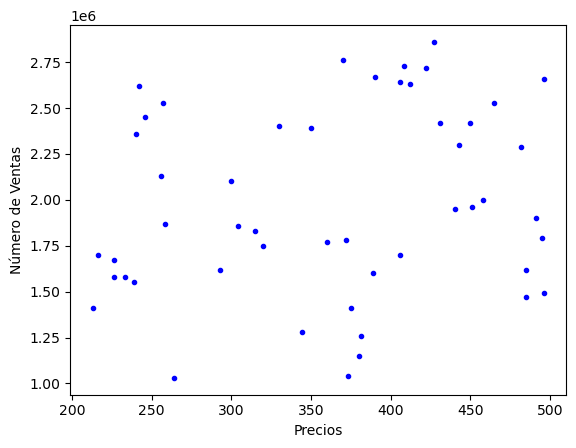

In [180]:
plt.plot(df['Precio'],df['Ventas'],"b.")
plt.xlabel("Precios")
plt.ylabel("Número de Ventas")
plt.show()

Construimos el Modelo

In [182]:
from sklearn.linear_model import LinearRegression

In [187]:
lin_reg = LinearRegression()
lin_reg.fit(df['Precio'].values.reshape(-1, 1), df['Ventas'].values)

LinearRegression()

In [189]:
lin_reg.intercept_

1590282.9971830067

In [191]:
lin_reg.coef_

array([1088.6119011])

In [193]:
# Predicción para el valor mínimo y máximo del conjunto de datos de entrenamiento
X_min_max = np.array([[df["Precio"].min()], [df["Precio"].max()]])
y_train_pred = lin_reg.predict(X_min_max)

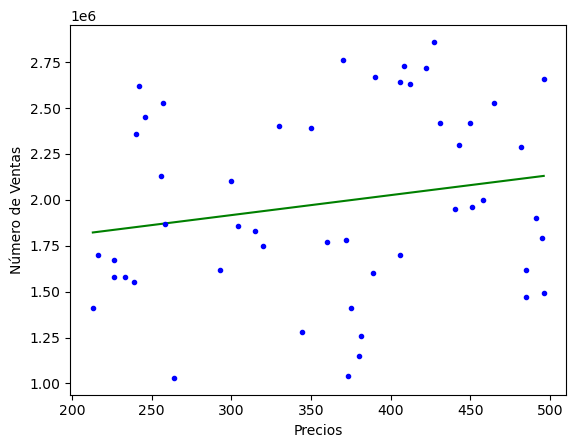

In [195]:
# Representación gráfica de la función hipótesis generada
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(df['Precio'],df['Ventas'],"b.")
plt.xlabel("Precios")
plt.ylabel("Número de Ventas")
plt.show()

Predicción de nuevos ejemplos:

In [201]:
x_new = np.array([[300]]) #Videoconsola de 200 euros

#Predicción del número de ventas
predicted_sells = lin_reg.predict(x_new)

print("El número de ventas prevista sería:", int(predicted_sells[0]), "€")

El número de ventas prevista sería: 1916866 €


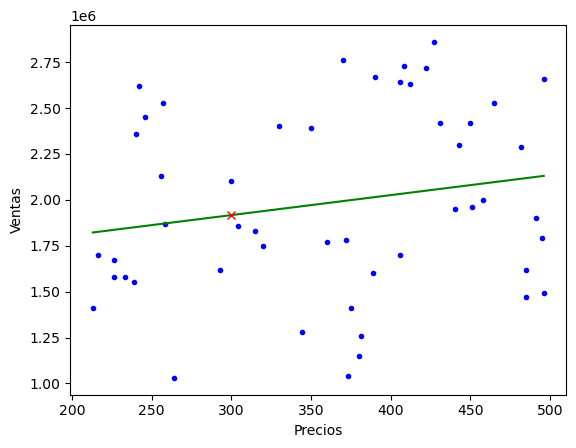

In [203]:
plt.plot(df['Precio'], df['Ventas'], "b.")
plt.plot(X_min_max, y_train_pred, "g-")
plt.plot(x_new, predicted_sells, "rx")
plt.xlabel("Precios")
plt.ylabel("Ventas")
plt.show()